In [1]:
# Importing libraries and reading data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'Dataset\train_ctrUa4K.csv')

# Viewing the imported data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
# Exploring the data
print('Data Describtion\n', df.describe())
print('\nData Shape\n', df.shape, '\n\nData Info')
print(df.info())
print('\nData Types\n', df.dtypes)

Data Describtion
        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  

Data Shape
 (614, 13) 

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 e

From the information provided, we can see the following:
* The data includes 11 Independent Variables [Gender, Married, ... Etc], and 1 Dependent Variable [Loan_Status].
* The data contains 614 rows and 13 columns.

### 1 - Data Cleaning and Preprocessing:

In this Section we will do the following:
* Clean the dataset by handling missing values, duplicate records, and outliers.
* Impute missing data using appropriate techniques and decide on strategies for dealing with outliers.


#### 1.1 - Renaming and Adding Columns

In [3]:
# First, let's rename the columns that have concatenated strings
df.rename(columns = {'ApplicantIncome':'Applicant_Income',
                    'CoapplicantIncome':'Coapplicant_Income',
                    'LoanAmount':'Loan_Amount'}, inplace = True)
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


#### 1.2 - Handeling Missing Values

In [4]:
# Checking for missing values
df.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

Columns Gender, Married, Dependents, Self_Employed, Loan_Amount, Loan_Amount_Term, and Credit_History are missing values.

In [5]:
# Viewing the counts of the columns that have missing values
print('Gender Counts\n',df['Gender'].value_counts())
print('\nMarried Counts\n',df['Married'].value_counts())
print('\nDependents Counts\n',df['Dependents'].value_counts())
print('\nSelf_Employed Counts\n',df['Self_Employed'].value_counts())
print('\nLoan_Amount Counts\n',df['Loan_Amount'].value_counts())
print('\nLoan_Amount_Term Counts\n',df['Loan_Amount_Term'].value_counts())
print('\nCredit_History Counts\n',df['Credit_History'].value_counts())

Gender Counts
 Gender
Male      489
Female    112
Name: count, dtype: int64

Married Counts
 Married
Yes    398
No     213
Name: count, dtype: int64

Dependents Counts
 Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Self_Employed Counts
 Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Loan_Amount Counts
 Loan_Amount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

Loan_Amount_Term Counts
 Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

Credit_History Counts
 Credit_History
1.0    475
0.0     89
Name: count, dtype: int64


For the categorical and ordainal variales, the missing values will be filled as follows:

* For Gender, Married, Dependents, Self_Employed, and Credit_History columns, we will use the mode of each column to fill the missing values.

For the numerical variables, the missing values will be filled as follows:

* For Loan_Amount column, we will use the median to fill the missing values.

* For Loan_Amount_Term column, it is shown that the most repeated value (Mode) is 360, so we will fill the missing values with this value using the mode.


In [6]:
# Filling the missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Loan_Amount'].fillna(df['Loan_Amount'].median(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

# Confirming changes 
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

#### 1.3 - Handeling Duplicate Records

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

#### 1.4 - Handeling the Outliers

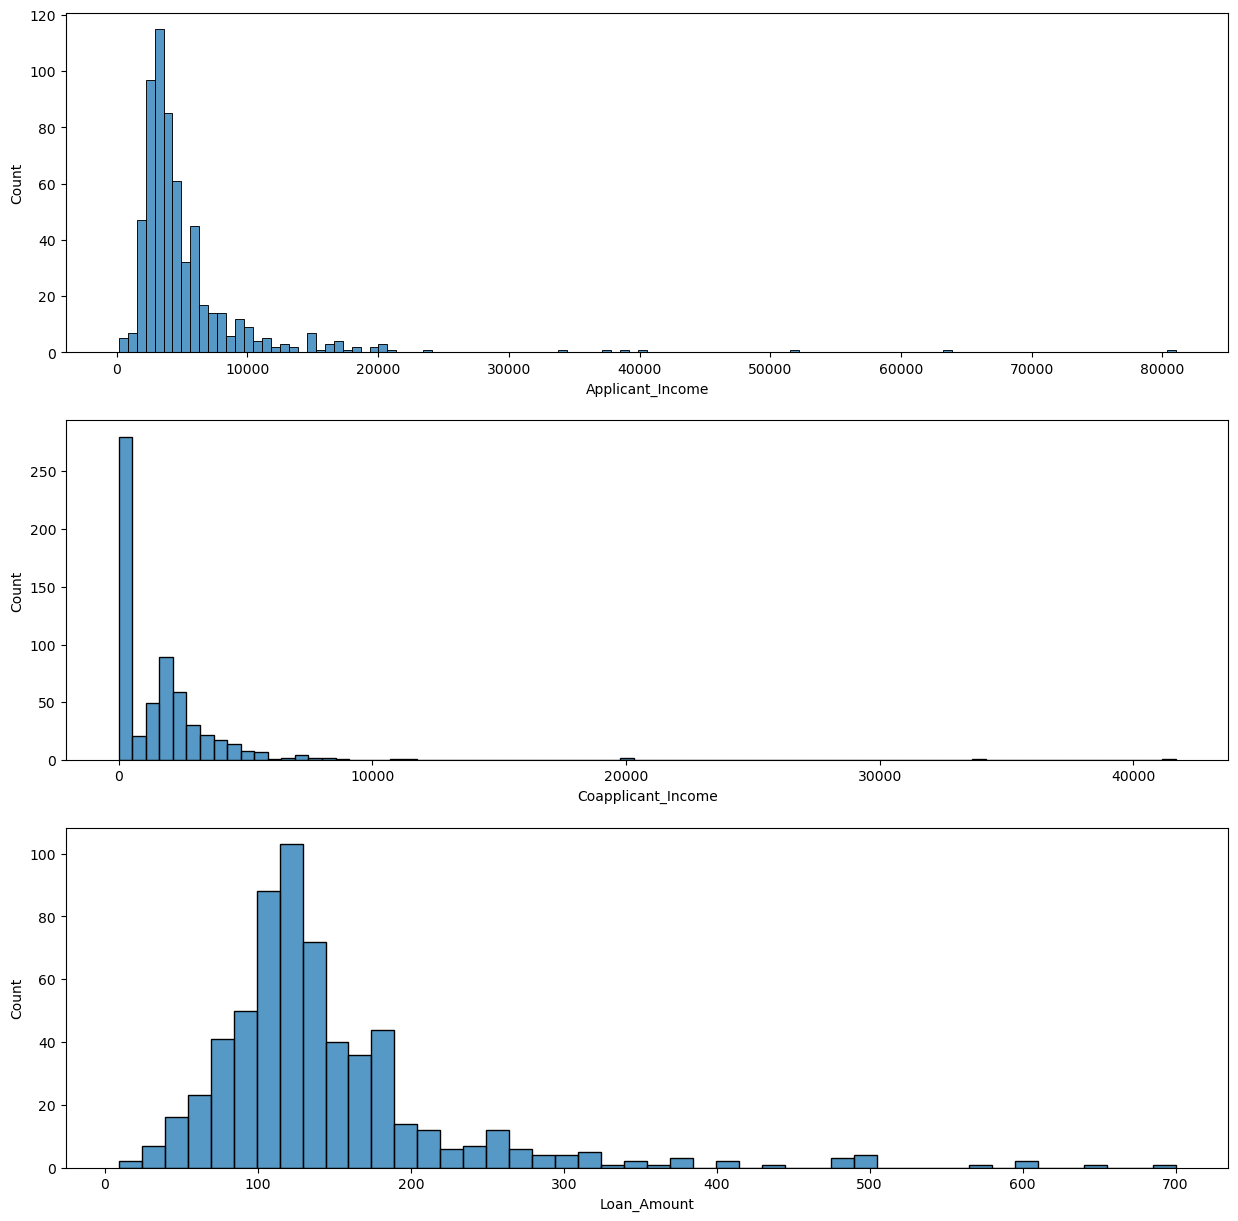

In [8]:
# Ploting the numerical variables
fig, axs = plt.subplots(3,1, figsize=(15,15))
sns.histplot(ax = axs[0],x = df['Applicant_Income'])
sns.histplot(ax = axs[1],x = df['Coapplicant_Income'])
sns.histplot(ax = axs[2],x = df['Loan_Amount'])
plt.show()

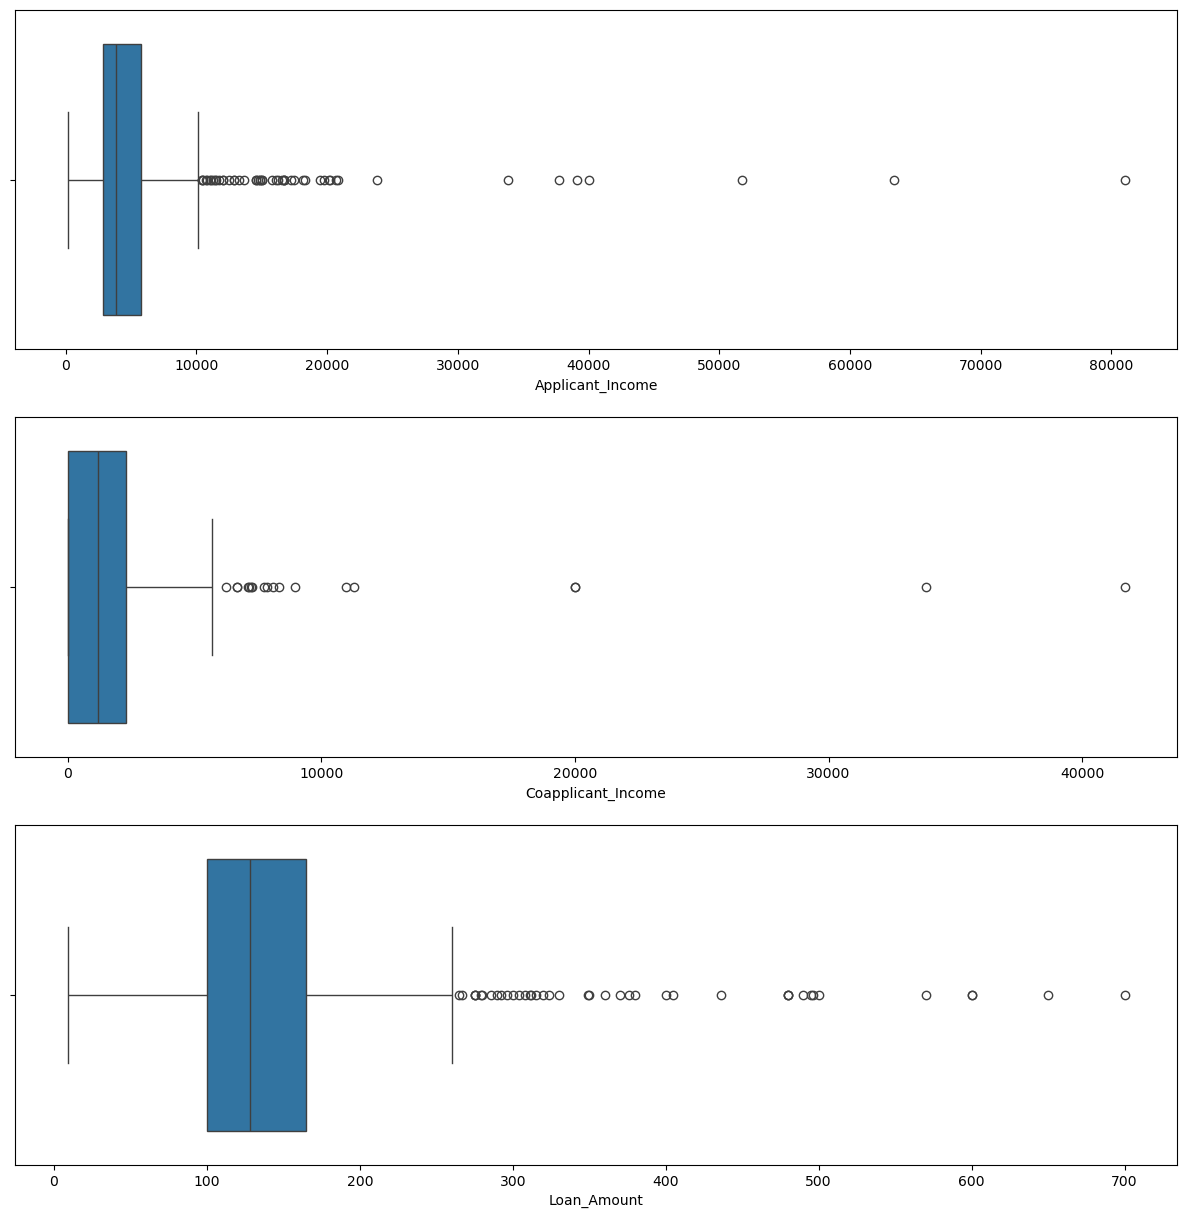

In [9]:
# View the outliers using boxplot
fig, axs = plt.subplots(3,1, figsize=(15,15))
sns.boxplot(ax = axs[0], x = df['Applicant_Income'])
sns.boxplot(ax = axs[1], x = df['Coapplicant_Income'])
sns.boxplot(ax = axs[2], x = df['Loan_Amount'])
plt.show()

The Applicant_Income, Coapplicant_Income, and Loan_Amount are right skewness due to the outliers. Since these data are valuable and cannot be removed, the skewness can be solved by applying the log transformation to these variables.


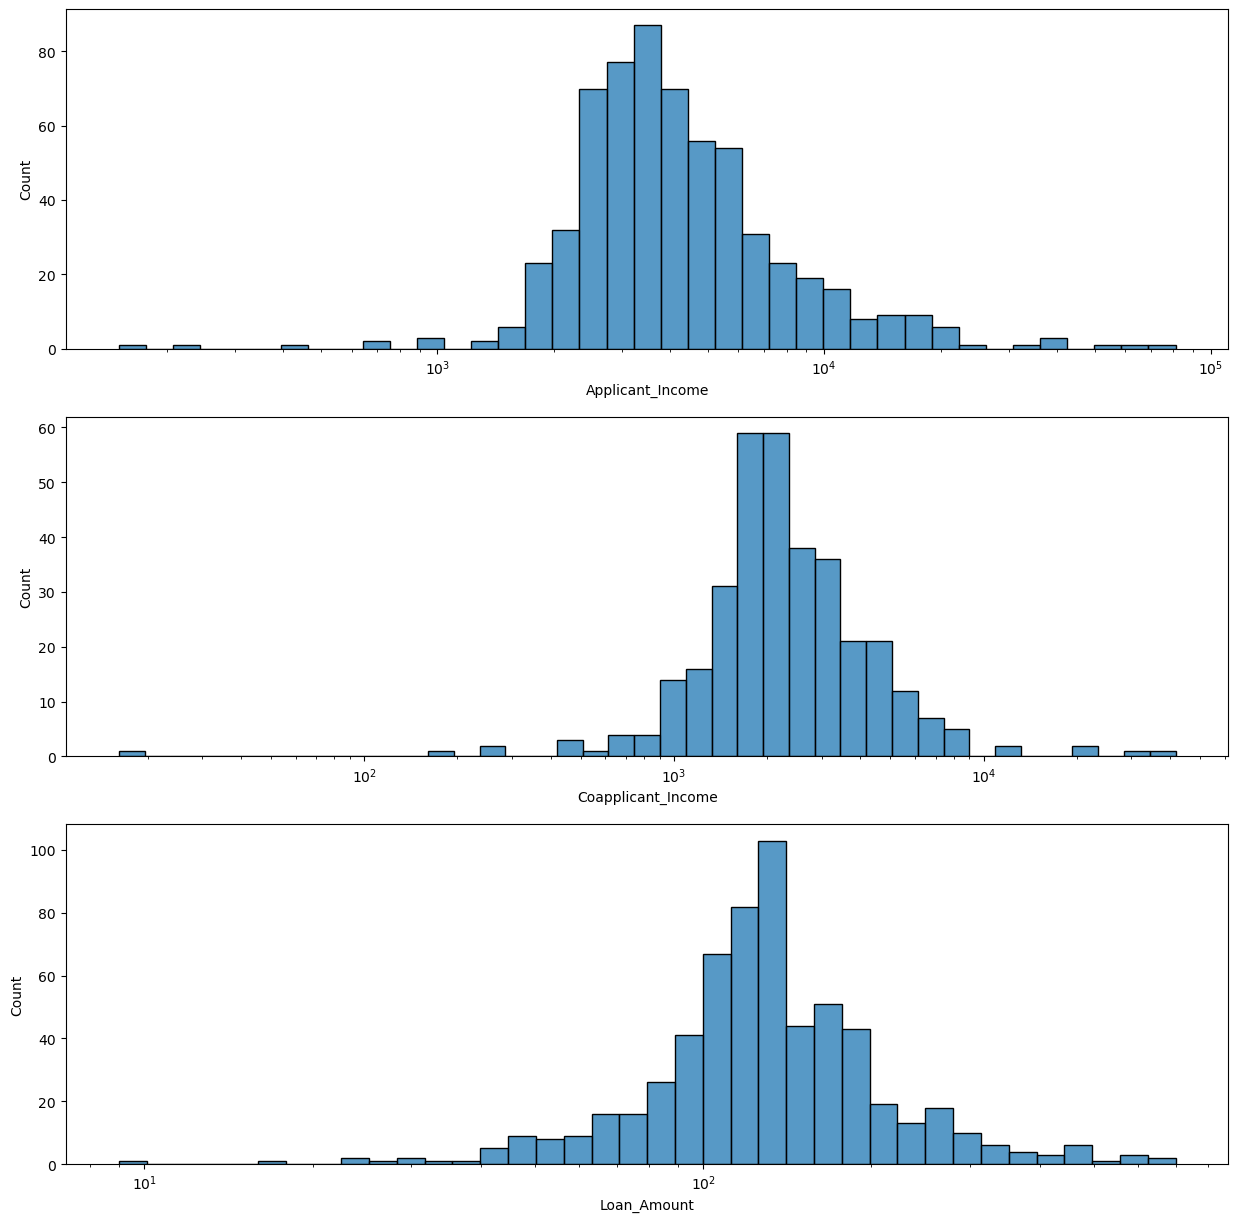

In [10]:
# Re-viewing the numerical variables after applying the log transformation
fig, axs = plt.subplots(3,1, figsize=(15, 15))
sns.histplot(ax = axs[0],x = df['Applicant_Income'], log_scale=True)
sns.histplot(ax = axs[1],x = df['Coapplicant_Income'], log_scale=True)
sns.histplot(ax = axs[2],x = df['Loan_Amount'], log_scale=True)
plt.show()

After applying the log transformation, the distribution of the data is closer to normal and the effect of the outliners has been significantly reduced. 

### 2 - Exploring Data Analysis

In this Section we will do the following:
* Perform exploratory data analysis to gain insights into the data.
* Calculate summary statistics, visualize distributions, and create plots to understand the relationships between different variables.
* Identify patterns and trends that could influence loan approval.


#### The Dependent Variable

In [11]:
# Exploring the Dependent Varialbe
print('Loan Status Counts\n',df['Loan_Status'].value_counts())
print('\nLoan Status Normalized\n',df['Loan_Status'].value_counts(normalize = True))

Loan Status Counts
 Loan_Status
Y    422
N    192
Name: count, dtype: int64

Loan Status Normalized
 Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


<Axes: xlabel='Loan_Status'>

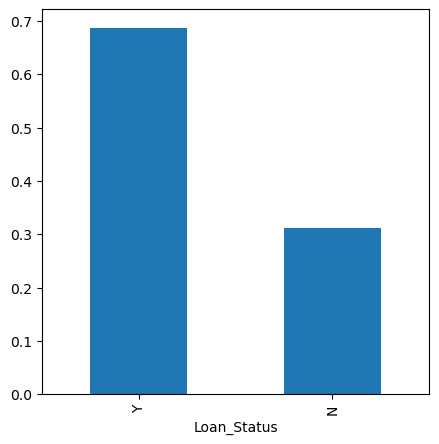

In [12]:
# Plotting the Dependednt Variable
df['Loan_Status'].value_counts(normalize = True).plot.bar(figsize=(5,5))

* Around 69% of the applicants (422) out of (614) got their loans approved.

#### The Categorical Independent Variables
    [Gender, Married, Self_Employed, Credit_History]

In [13]:
# Exploring the Categorical Independent Varialbes
print('Gender Counts\n',df['Gender'].value_counts())
print('\nGender Normalized\n',df['Gender'].value_counts(normalize = True))

print('\nMarried Counts\n',df['Married'].value_counts())
print('\nMarried Normalized\n',df['Married'].value_counts(normalize = True))

print('\nSelf Employed Counts\n',df['Self_Employed'].value_counts())
print('\nSelf Employed Normalized\n',df['Self_Employed'].value_counts(normalize = True))

print('\nCredit History Counts\n',df['Credit_History'].value_counts())
print('\nCredit History Normalized\n',df['Credit_History'].value_counts(normalize = True))

Gender Counts
 Gender
Male      502
Female    112
Name: count, dtype: int64

Gender Normalized
 Gender
Male      0.81759
Female    0.18241
Name: proportion, dtype: float64

Married Counts
 Married
Yes    401
No     213
Name: count, dtype: int64

Married Normalized
 Married
Yes    0.653094
No     0.346906
Name: proportion, dtype: float64

Self Employed Counts
 Self_Employed
No     532
Yes     82
Name: count, dtype: int64

Self Employed Normalized
 Self_Employed
No     0.86645
Yes    0.13355
Name: proportion, dtype: float64

Credit History Counts
 Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

Credit History Normalized
 Credit_History
1.0    0.855049
0.0    0.144951
Name: proportion, dtype: float64


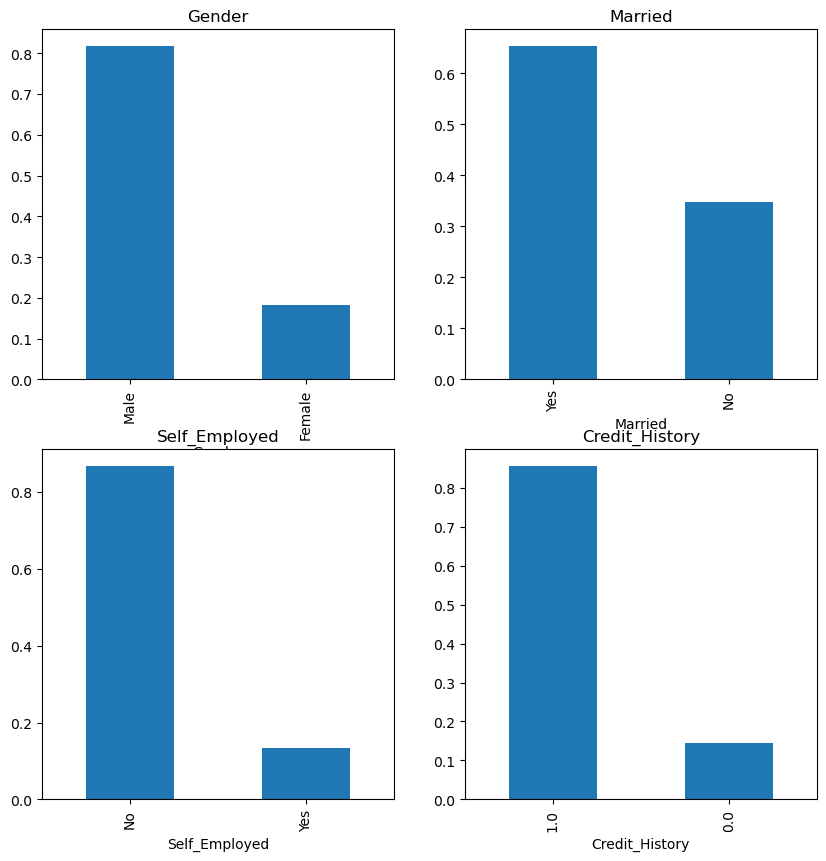

In [14]:
# Plotting the Categorical Independent Varialbes
fig, axs = plt.subplots(2,2, figsize=(10,10))
df['Gender'].value_counts(normalize=True).plot.bar(ax = axs[0,0], title = 'Gender')
df['Married'].value_counts(normalize=True).plot.bar(ax = axs[0,1], title = 'Married')
df['Self_Employed'].value_counts(normalize=True).plot.bar(ax = axs[1,0], title = 'Self_Employed')
df['Credit_History'].value_counts(normalize=True).plot.bar(ax = axs[1,1], title = 'Credit_History')
plt.show()

* Around 82% of the applicants (502) are males, and 18% are females.
* Around 65% of the applicants (401) are married, and 35% are not married.
* Around 87% of the applicants (532) are not self-employed, and 13% are self-employed.
* Around 86% of the applicants (525) have credit history, and 14% did not have credit history.

#### The Ordinal Independent Variables
    [Dependents, Education, Property_Area]

In [15]:
# Exploring the Ordianl Independent Varialbes
print('\nDependents Counts\n',df['Dependents'].value_counts())
print('\nDependents Normalized\n',df['Dependents'].value_counts(normalize = True))

print('\nEducation Counts\n',df['Education'].value_counts())
print('\nEducation Normalized\n',df['Education'].value_counts(normalize = True))

print('\nProperty Area Counts\n',df['Property_Area'].value_counts())
print('\nProperty Area Normalized\n',df['Property_Area'].value_counts(normalize = True))


Dependents Counts
 Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

Dependents Normalized
 Dependents
0     0.586319
1     0.166124
2     0.164495
3+    0.083062
Name: proportion, dtype: float64

Education Counts
 Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Education Normalized
 Education
Graduate        0.781759
Not Graduate    0.218241
Name: proportion, dtype: float64

Property Area Counts
 Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Property Area Normalized
 Property_Area
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: proportion, dtype: float64


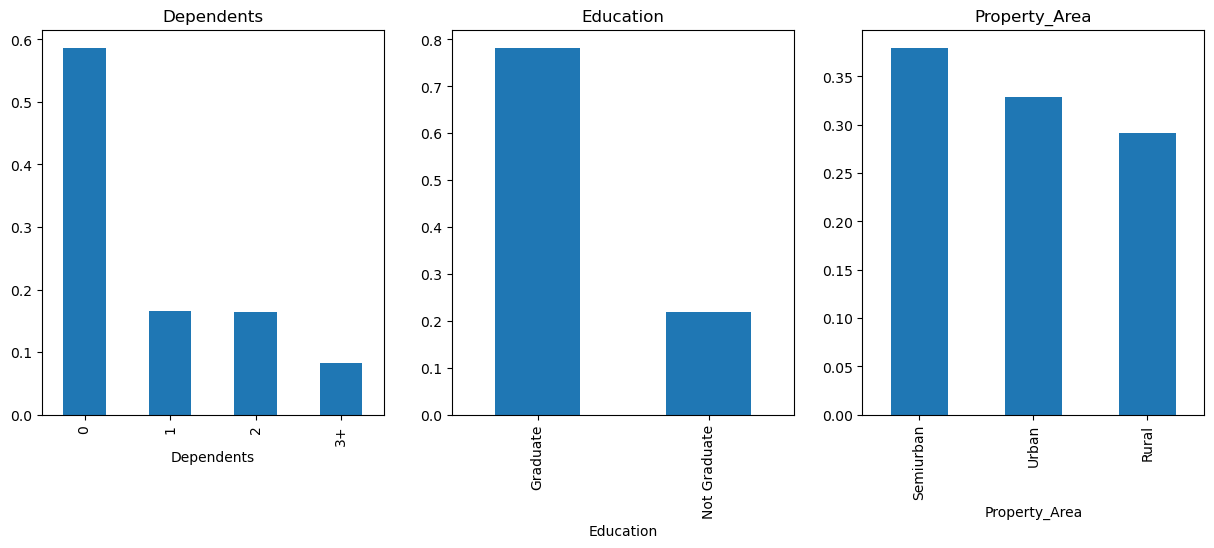

In [16]:
# Plotting the Ordinal Independent Varialbes
fig, axs = plt.subplots(1,3, figsize=(15,5))
df['Dependents'].value_counts(normalize=True).plot.bar(ax = axs[0], title = 'Dependents')
df['Education'].value_counts(normalize=True).plot.bar(ax = axs[1], title = 'Education')
df['Property_Area'].value_counts(normalize=True).plot.bar(ax = axs[2], title = 'Property_Area')
plt.show()

* Around 59% of the applicants (360) do not have dependents, 17% have one dependent, 16% have two dependents, and 8% have three or more dependents.
* Around 78% of the applicants (480) are graduates, and 22% are not graduates.
* Around 38% of the applicants (233) are from semi-urban areas, 33% are from urban areas, and 29% are from rural areas.


#### The Numerical Independent Variables
    [Applicant_Income, Coapplicant_Income, Loan_Amount]

    We previously shown that the Applicant_Income, Coapplicant_Income, and Loan Amount are right skewed due to the outliers and we fixed this by applying log transformation on them.

Now we will see the relationships between the dependent and independent variables 

### 3 - Feature Engineering

In this Section we will create new features to capture valuable information from the existing columns, such as:

* Create Total_Income column that combine the Applicant_Income and Coapplicant_Income.

* Create EMI column that represents the Equated Monthly Installment the appliant should pay by calculating the Loan_Amount*1000 (to equivalence the units) over the Loan_Amount_Term.

* Create Remaining_Income column that represent the remaining income left after paying the EMI by deducting the EMI from the Total_Income.


#### 3.1 - Creating Total_Income Column

In [17]:
# Creating Total_Income column
df['Total_Income'] = df['Applicant_Income'] + df['Coapplicant_Income']

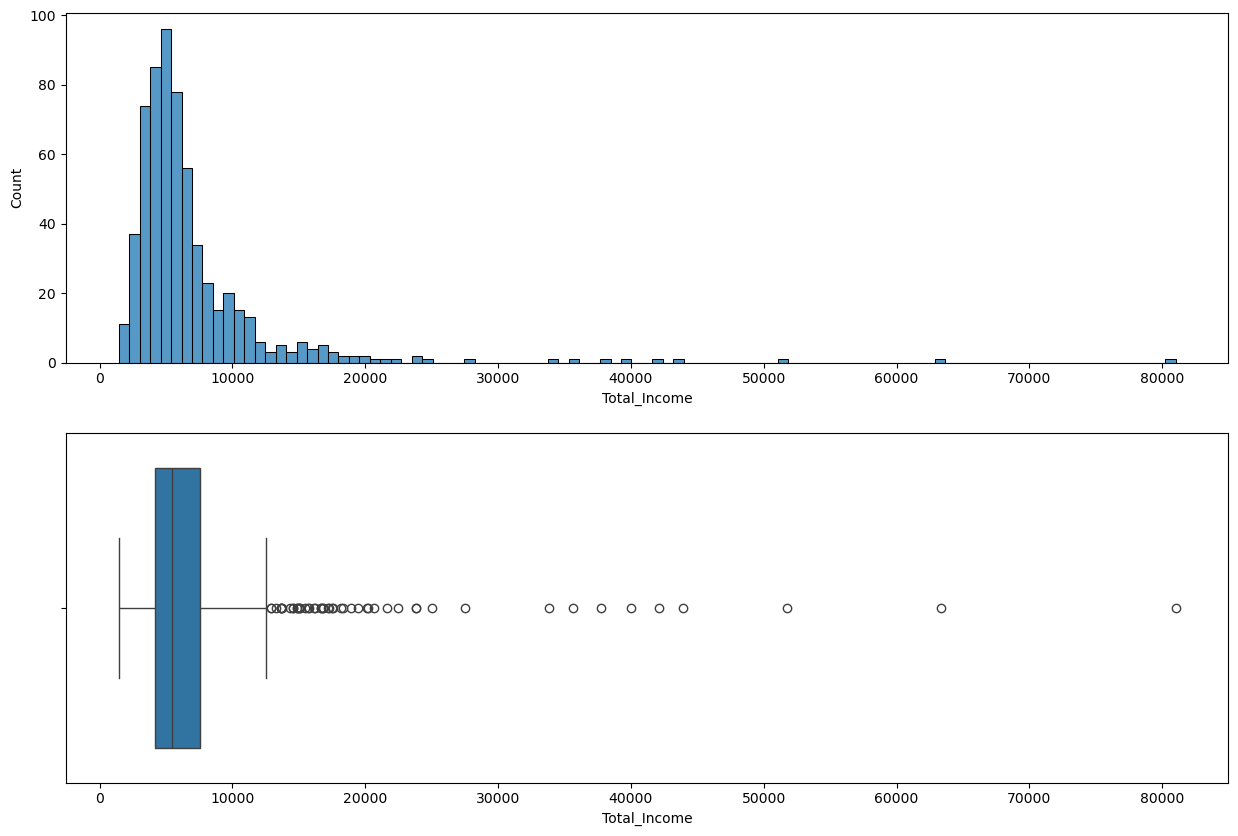

In [18]:
# Plotting Total_Income
fig, axs = plt.subplots(2,1, figsize=(15,10))
sns.histplot(ax = axs[0], x = df['Total_Income'])
sns.boxplot(ax = axs[1], x = df['Total_Income'])
plt.show()

The Total_Income is right skewness due to the outliers. Since these data are valuable and cannot be removed, the skewness can be solved by applying the log transformation to these variables.

<Axes: xlabel='Total_Income', ylabel='Count'>

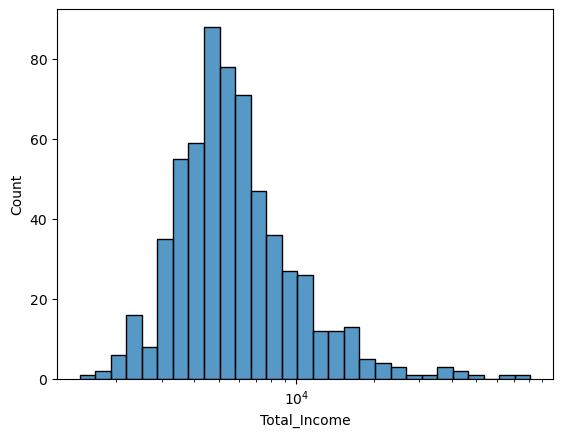

In [19]:
# Re-viewing Total_Income after applying the log transformation
sns.histplot(x = df['Total_Income'], log_scale=True)

After applying the log transformation, the distribution of the data is closer to normal and the effect of the outliners has been significantly reduced. 

#### 3.1 - Creating EMI Column

In [20]:
# Creating EMI column
df['EMI'] = (df['Loan_Amount']*1000) / df['Loan_Amount_Term']

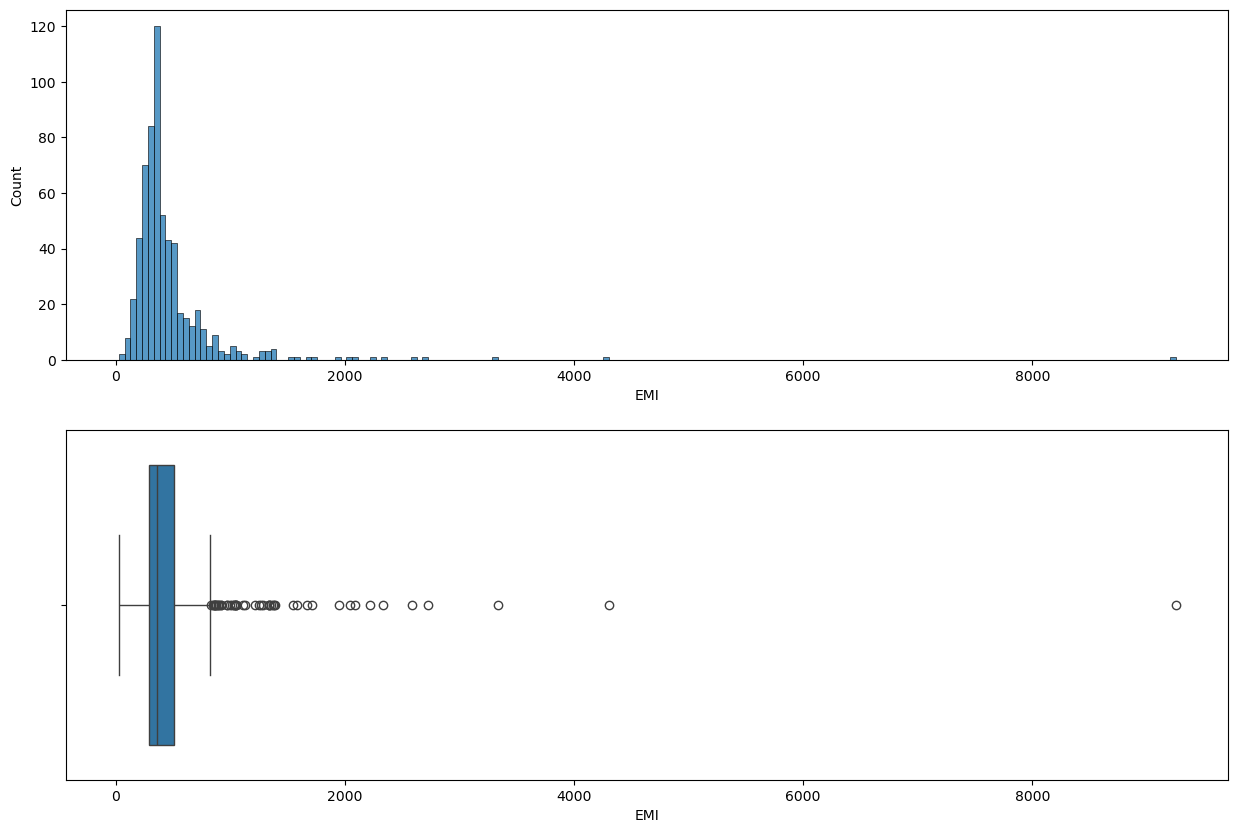

In [21]:
# Plotting EMI
fig, axs = plt.subplots(2,1, figsize=(15,10))
sns.histplot(ax = axs[0], x = df['EMI'])
sns.boxplot(ax = axs[1], x = df['EMI'])
plt.show()

The EMI is right skewness due to the outliers. Since these data are valuable and cannot be removed, the skewness can be solved by applying the log transformation to these variables.

<Axes: xlabel='EMI', ylabel='Count'>

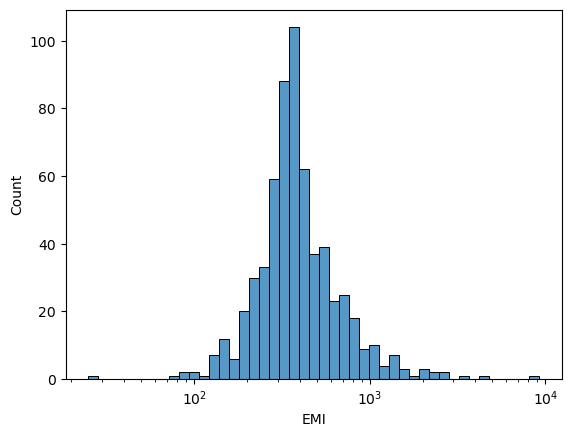

In [22]:
# Re-viewing EMI after applying the log transformation
sns.histplot(x = df['EMI'], log_scale=True)

After applying the log transformation, the distribution of the data is closer to normal and the effect of the outliners has been significantly reduced. 

#### 3.1 - Creating Remaining_Income Column

In [23]:
# Creating Remaining_Income column
df['Remaining_Income'] = df['Total_Income'] - df['EMI']

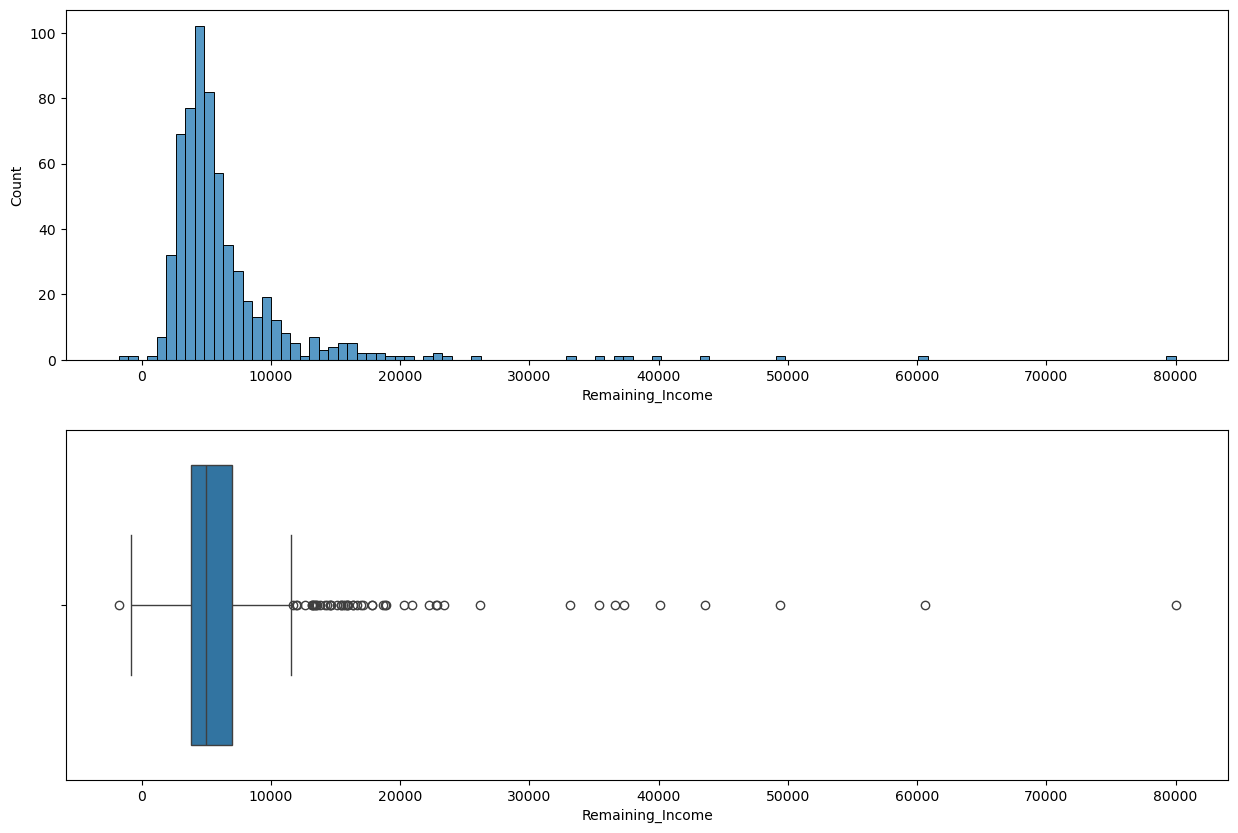

In [24]:
# Plotting Remaining_Income
fig, axs = plt.subplots(2,1, figsize=(15,10))
sns.histplot(ax = axs[0], x = df['Remaining_Income'])
sns.boxplot(ax = axs[1], x = df['Remaining_Income'])
plt.show()

The Remaining_Income is right skewness due to the outliers. Since these data are valuable and cannot be removed, the skewness can be solved by applying the log transformation to these variables.

<Axes: xlabel='Remaining_Income', ylabel='Count'>

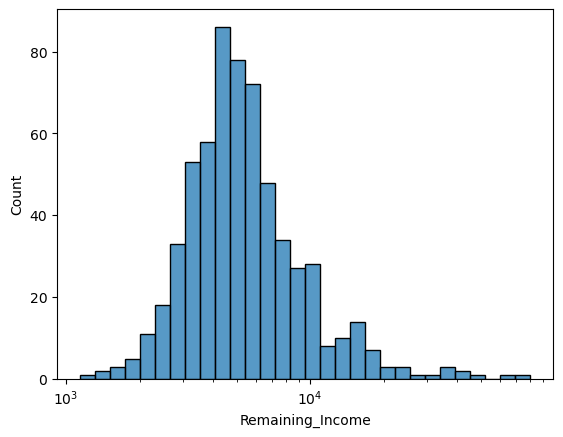

In [25]:
# Re-viewing Remaining_Income after applying the log transformation
sns.histplot(x = df['Remaining_Income'], log_scale=True)

After applying the log transformation, the distribution of the data is closer to normal and the effect of the outliners has been significantly reduced. 

### 4 - Data Transformation

In this Section we do the following:

* Encode categorical variables using techniques like one-hot encoding or label encoding.

* Standardize or normalize numerical features if required for certain machine learning algorithms.

For this section we will create a new dataframe and apply all the transformation on it to be used later in the ML algorithm.


#### 4.1 - Encoding The Dependent Variable

    [Loan_Status]

For The Dependent Variable we will use Label Encoding to transform the data as following

* For Loan_Status column -----------> N  = 0         , Y   = 1

In [26]:
# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [27]:
# Creating new dataframe (df1)
df1 = df.copy()

# Creating the object
lbl_enc = LabelEncoder()

In [28]:
# Labeling Encoding the Dependent Variable
df1['Loan_Status'] = lbl_enc.fit_transform(df1['Loan_Status'])

In [29]:
# Confirming the changes
df1['Loan_Status'].describe()

count    614.000000
mean       0.687296
std        0.463973
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Loan_Status, dtype: float64

#### 4.2 - Encoding The Categorical Variables

    [Gender, Married, Self_Employed]

For These Variables we will use Label Encoding to transform the data as following

* For Gender column ------------------> Female = 0     , Male = 1
* For Married column ------------------> No = 0         , Yes = 1
* For Self_Employed column --------> No = 0         , Yes = 1

In [30]:
# Labeling Encoding
# Gender column
df1['Gender'] = lbl_enc.fit_transform(df1['Gender'])

# Married column
df1['Married'] = lbl_enc.fit_transform(df1['Married'])

# Self_Employed column
df1['Self_Employed'] = lbl_enc.fit_transform(df1['Self_Employed'])

In [31]:
# Confirming the changes
df1.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Remaining_Income
0,LP001002,1,0,0,Graduate,0,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0,355.555556,5493.444444
1,LP001003,1,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,355.555556,5735.444444
2,LP001005,1,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,183.333333,2816.666667
3,LP001006,1,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,333.333333,4607.666667
4,LP001008,1,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,391.666667,5608.333333


#### 4.3 - Encoding The Ordinal Variables

    [Dependents, Education, Property_Area]

For These Variables we will use Category Encoding to map specific values to the data as following:

* For Dependents column ---------------> 0 = 0     , 1 = 1, 2 = 2, 3+ = 3
* For Education column ------------------> Not Graduate = 0         , Graduate = 1
* For Property_Area column ------------> No = 0         , Yes = 1

In [32]:
# Importing Category_Encoders
import category_encoders as ce

In [33]:
# Category Encoding
# Dependents column
Dependents_enc = ce.OrdinalEncoder(cols = ['Dependents'], return_df=True,
                                  mapping = [{'col':'Dependents', 'mapping':{'0':0,'1':1,'2':2,'3+':3}}])
df1 = Dependents_enc.fit_transform(df1)

# Education column
Education_enc = ce.OrdinalEncoder(cols = ['Education'], return_df=True,
                                  mapping = [{'col':'Education', 'mapping':{'Not Graduate':0,'Graduate':1}}])
df1 = Education_enc.fit_transform(df1)

# Property_Area column
Property_Area_enc = ce.OrdinalEncoder(cols = ['Property_Area'], return_df=True,
                                  mapping = [{'col':'Property_Area', 'mapping':{'Rural':0,'Semiurban':1,'Urban':2}}])
df1 = Property_Area_enc.fit_transform(df1)

In [34]:
# Confirming the changes
df1.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Remaining_Income
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1,2900.0,197.222222,2702.777778
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1,4106.0,222.222222,3883.777778
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1,8312.0,702.777778,7609.222222
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1,7583.0,519.444444,7063.555556
613,LP002990,0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1,0,4583.0,369.444444,4213.555556


#### 4.4 - Encoding The Numerical Variables

    [Applicant_Income, Coapplicant_Income, Loan_Amount, Loan_Amount_Term]

For These Variables we will use Normalization to scale the data

In [35]:
# Importing MinMaxScaler to normalize the numerical data
from sklearn.preprocessing import MinMaxScaler

In [36]:
# Creating the object
minmax_scale = MinMaxScaler()

In [37]:
# Normalizing the numerical variables
df1[['Applicant_Income', 'Coapplicant_Income',
     'Loan_Amount', 'Loan_Amount_Term']] = minmax_scale.fit_transform(df1[['Applicant_Income', 'Coapplicant_Income',
                                                                           'Loan_Amount', 'Loan_Amount_Term']])

In [38]:
# Confirming the changes
df1.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Remaining_Income
0,LP001002,1,0,0,1,0,0.070489,0.000000,0.172214,0.74359,1.0,2,1,5849.0,355.555556,5493.444444
1,LP001003,1,1,1,1,0,0.054830,0.036192,0.172214,0.74359,1.0,0,0,6091.0,355.555556,5735.444444
2,LP001005,1,1,0,1,1,0.035250,0.000000,0.082489,0.74359,1.0,2,1,3000.0,183.333333,2816.666667
3,LP001006,1,1,0,0,0,0.030093,0.056592,0.160637,0.74359,1.0,2,1,4941.0,333.333333,4607.666667
4,LP001008,1,0,0,1,0,0.072356,0.000000,0.191027,0.74359,1.0,2,1,6000.0,391.666667,5608.333333


#### 4.5 - Encoding The New Columns (Numerical Variables

    [Total_Income, EMI, Remaining_Income]

For These Variables we will also use Normalization to scale the data

In [39]:
# Normalizing the new columns (numerical variables)
df1[['Total_Income', 'EMI', 'Remaining_Income']] = minmax_scale.fit_transform(df1[['Total_Income', 'EMI', 'Remaining_Income']])

In [40]:
# Confirming the changes
df1.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Remaining_Income
0,LP001002,1,0,0,1,0,0.070489,0.000000,0.172214,0.74359,1.0,2,1,0.055394,0.035833,0.088805
1,LP001003,1,1,1,1,0,0.054830,0.036192,0.172214,0.74359,1.0,0,0,0.058435,0.035833,0.091765
2,LP001005,1,1,0,1,1,0.035250,0.000000,0.082489,0.74359,1.0,2,1,0.019583,0.017164,0.056069
3,LP001006,1,1,0,0,0,0.030093,0.056592,0.160637,0.74359,1.0,2,1,0.043980,0.033424,0.077973
4,LP001008,1,0,0,1,0,0.072356,0.000000,0.191027,0.74359,1.0,2,1,0.057292,0.039747,0.090211


#### 4.6 - Dropping The Loan_ID Column

In [41]:
# Dropping the Loan_ID column
df1 = df1.drop(['Loan_ID'], axis=1)

In [42]:
# Confirming the changes
df1.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Remaining_Income
0,1,0,0,1,0,0.070489,0.000000,0.172214,0.74359,1.0,2,1,0.055394,0.035833,0.088805
1,1,1,1,1,0,0.054830,0.036192,0.172214,0.74359,1.0,0,0,0.058435,0.035833,0.091765
2,1,1,0,1,1,0.035250,0.000000,0.082489,0.74359,1.0,2,1,0.019583,0.017164,0.056069
3,1,1,0,0,0,0.030093,0.056592,0.160637,0.74359,1.0,2,1,0.043980,0.033424,0.077973
4,1,0,0,1,0,0.072356,0.000000,0.191027,0.74359,1.0,2,1,0.057292,0.039747,0.090211


By finailzing these transformation, the data is ready to be analyzed.

### 5 - Correlation Analysis

In this Section we do the following:

* Analyze the correlation between various features and the target variable (Loan_Status).
* Identify features that have a significant impact on loan approval.

#### 5.1- The Categorical Independent Variables vs. Dependednt Variable
    We will view the relation between each independent variable with the Loan_Status to gain an insight of which is affecting the approval rates.
    
    We will create a function that will use pd.crosstab to create a dataframe that shows the count of approved and not approved applicant grouped by each independent variable, and then plot it for further understanding of the correlation between the data.

In [43]:
# Creating a function that take two variables and perform a crosstab and plotting
def two_var_relation(IV, DV, ticks, x=0, y = None):
    # Creating crosstab dataframe
    crosstab = pd.crosstab(df1[IV],df1[DV])
    
    # Plotting the dataframe
    if y == None:
        graph = crosstab.div(crosstab.sum(1), axis=0).plot.bar(ax = axs[x])
    else:
        graph = crosstab.div(crosstab.sum(1), axis=0).plot.bar(ax = axs[x,y])
    graph.set_xticklabels(ticks, rotation=0)
    graph.legend(['N','Y'], title = 'Loan_Status' , loc = 'lower right')
    for p in graph.patches:
        height = round(p.get_height(),2)
        graph.text(p.get_x()+p.get_width()/2, height+0.01 ,height ,ha="center")
    

We will use this function to show the relation between all categorical variables and the dependent variable.

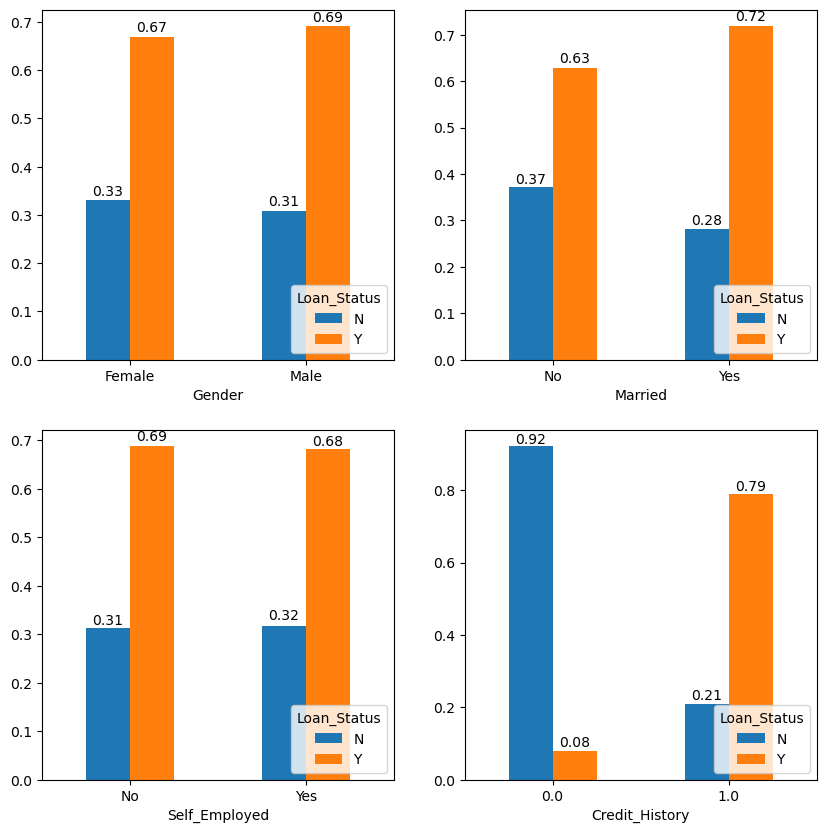

In [44]:
# Plotting all categorical variables
fig, axs=plt.subplots(2,2, figsize=(10,10))

# Gender Column

Gender_ticks = ['Female', 'Male']
ax = two_var_relation('Gender', 'Loan_Status', Gender_ticks, x=0, y=0)
# Married column
Married_ticks = ['No', 'Yes']
two_var_relation('Married', 'Loan_Status', Married_ticks, x=0, y=1)
# Self_Employed column
Self_Employed_ticks = ['No', 'Yes']
two_var_relation('Self_Employed', 'Loan_Status', Self_Employed_ticks, x=1, y=0)
# Credit_History column
Credit_History_ticks = ['0.0','1.0']
two_var_relation('Credit_History', 'Loan_Status', Credit_History_ticks, x=1, y=1)

plt.show()

From the graphs, the following can be shown:

* The proportion of male and female applicants is almost the same for both approved and not approved loans.

* The proportion of approved loans of married applicants is higher than the unmarried applicants.

* The proportion of approved loans vs. self-employed is the same for both sides.

* The proportion of approved loans of applicants that has credit history is much higher than the applicants that does not have credit history.

#### 5.2- The Ordinal Independent Variables vs. Dependednt Variable

    We will do the same analysis for the ordinal independent variables

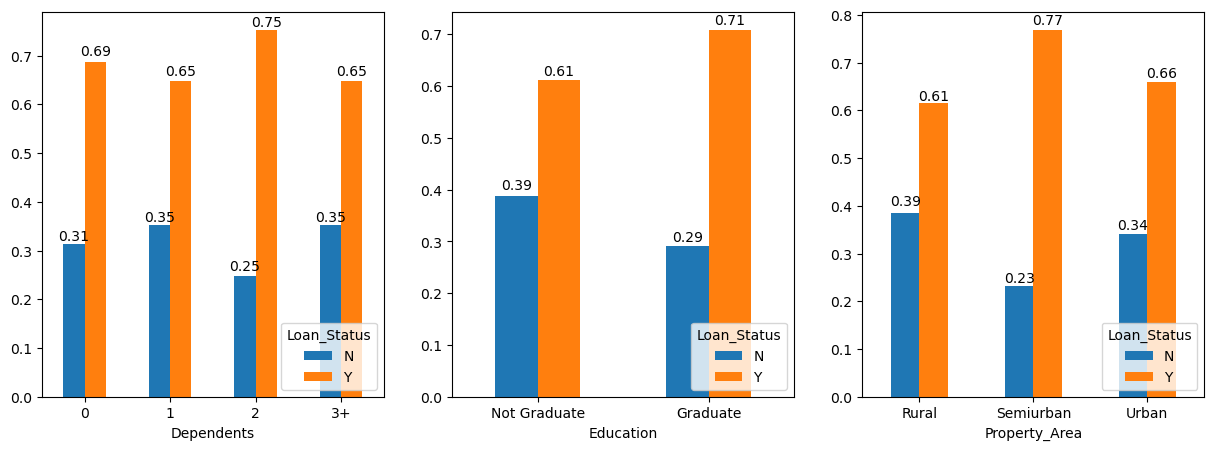

In [45]:
# Plotting all categorical variables
fig, axs=plt.subplots(1,3, figsize=(15,5))

# Dependents Column
Dependents_ticks = ['0', '1', '2', '3+']
two_var_relation('Dependents', 'Loan_Status', Dependents_ticks, x=0)
# Education column
Education_ticks = ['Not Graduate', 'Graduate']
two_var_relation('Education', 'Loan_Status', Education_ticks, x=1)
# Property_Area column
Property_Area_ticks = ['Rural', 'Semiurban', 'Urban']
two_var_relation('Property_Area', 'Loan_Status', Property_Area_ticks, x=2)

plt.show()

From the graphs, the following can be shown:

* The proportion of the applicants' dependents does not affect the approval rate as they have more or less similar proportions.

* The proportion of approved loans for graduate applicants is higher than the nun-graduate applicants.

* The proportion of approved loans of applicants from semi-urban areas is higher than the applicants from rural or urban areas.


#### 5.3- The Numerical Independent Variables vs. Dependednt Variable

    Starting with the Applicant_Income, Coapplicant_Income, Loan_Amount , we will create a function that categorize the variables values into 5 categories (Very Low, Low, Average, High, Very High) and then create a dataframe using pd.crosstab, and finally plotting the count of approved and not approved applicant grouped by these categories.

In [46]:
# Creating function 
def num_var_relation(IV, DV, bins, category, x=0, y=None):
    # Creating category bins
    new_col = IV + '_bin'
    df2 = df1.copy()
    df2[new_col] = pd.cut(df2[IV], bins, labels=category)

    # Creating crosstab dataframe
    crosstab = pd.crosstab(df2[new_col], df2[DV])
    

    
    # Plotting Applicant_Income_Bin vs. Loas_Status
    if y == None:
        graph = crosstab.div(crosstab.sum(1), axis=0).plot.bar(ax = axs[x])
    else:
        graph = crosstab.div(crosstab.sum(1), axis=0).plot.bar(ax = axs[x,y])
    graph.set_xticklabels(category, rotation=0)
    graph.legend(['N','Y'], title = 'Loan_Status' , loc = 'lower right')
    for p in graph.patches:
        height = round(p.get_height(),2)
        graph.text(p.get_x()+p.get_width()/2, height+0.01 ,height ,ha="center")


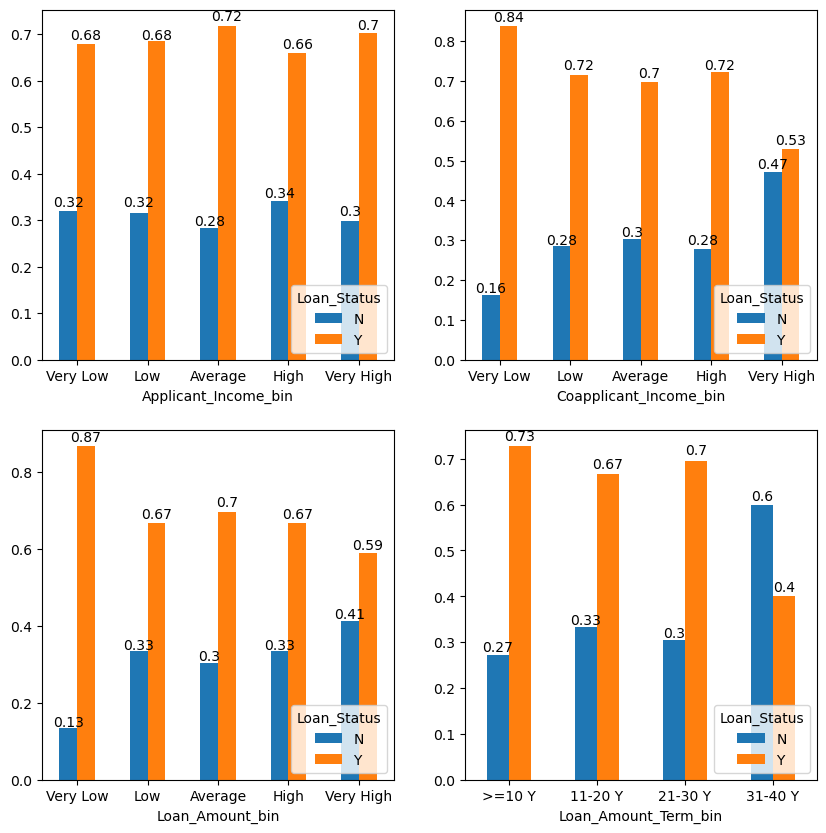

In [47]:
fig, axs=plt.subplots(2,2, figsize=(10,10))

# Applicant_Income column
bins = [0,0.031,0.062,0.1,0.15,1.1]
category = ['Very Low', 'Low', 'Average', 'High', 'Very High']
num_var_relation('Applicant_Income', 'Loan_Status', bins, category, x=0, y=0)
# Coapplicant_Income column
bins = [0.0000001,0.031,0.062,0.1,0.15,1.1]
num_var_relation('Coapplicant_Income', 'Loan_Status', bins, category, x=0, y=1)
# Loan_Amount column
bins = [0,0.07,0.15,0.3,0.4,1.1]
num_var_relation('Loan_Amount', 'Loan_Status', bins, category, x=1, y=0)
# Loan_Amount_Term column
bins = [0,0.25,0.50,0.75,1.1]
category = ['>=10 Y', '11-20 Y', '21-30 Y', '31-40 Y']
num_var_relation('Loan_Amount_Term', 'Loan_Status', bins, category, x=1, y=1)

plt.show()

From the graphs, the following can be shown:

* The proportion of the applicants' income and coapplicants' income does not affect the approval rate as they have more or less similar proportions.

* The proportion of approved loans for loan amounts less than 2500 is higher than other loan amounts.

* The proportion of approved loans of applicants that apply for long terms (31-40 years) is lower than the applicants that applies from other loan amount terms.

#### 5.4- The New Numerical Variables vs. Dependednt Variable

    For the Total_Income, Remaining_Income, and EMI, we will use the same function created earlier to plot the count of approved and not approved applicant grouped by these categories.

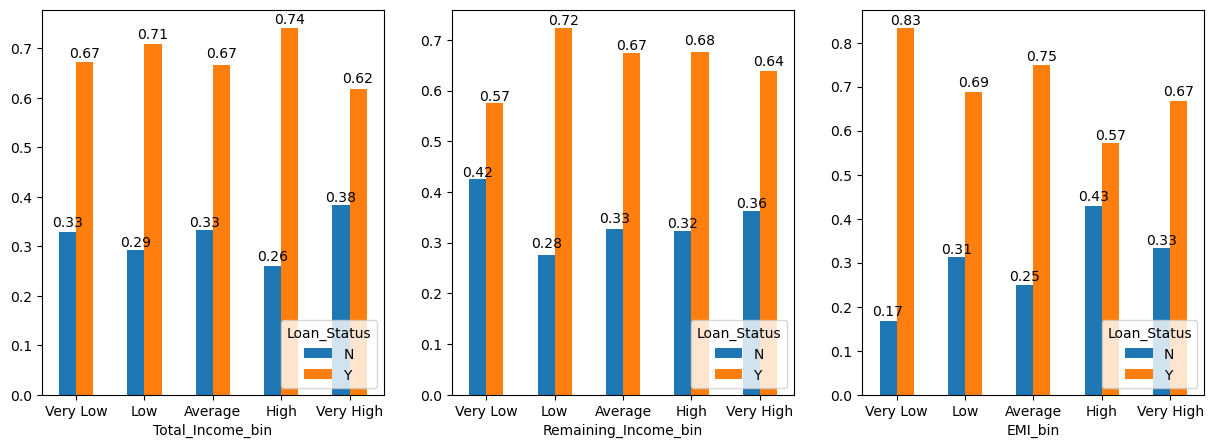

In [48]:
fig, axs=plt.subplots(1,3, figsize=(15,5))

# Total_Income column
bins = [0,0.031,0.062,0.1,0.15,1.1]
category = ['Very Low', 'Low', 'Average', 'High', 'Very High']
num_var_relation('Total_Income', 'Loan_Status', bins, category, x=0)
# Remaining_Income column
bins = [0,0.06,0.1,0.14,0.18,1.1]
num_var_relation('Remaining_Income', 'Loan_Status', bins, category, x=1)
# EMI column
bins = [0,0.01,0.15,0.2,0.3,1.1]
num_var_relation('EMI', 'Loan_Status', bins, category, x=2)


plt.show()

From the graphs, the following can be shown:

* The proportion of the applicants' total income does not affect the approval rate as they have more or less similar proportions.

* The proportion of the approval rate of the applicants that has very low remaining income is less that other applicants.

* The proportion of approved loans of applicants that has low EMI is higher than the other applicants.

#### 5.5- Correlation Analysis

<Axes: >

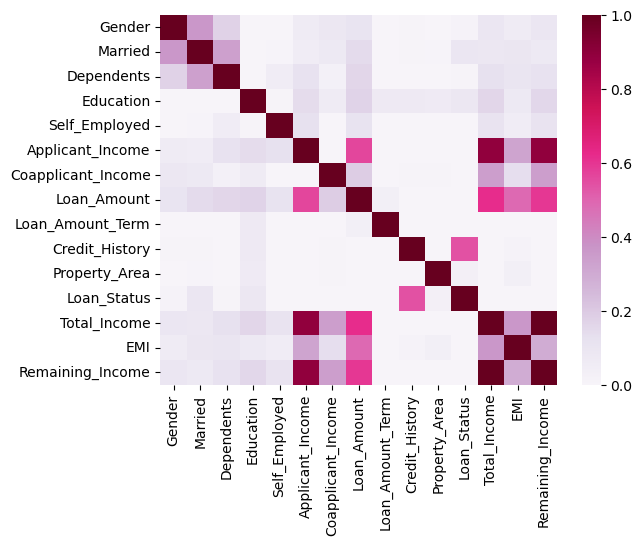

In [49]:
sns.heatmap(df1.corr(), cmap='PuRd', vmin=0)

Dropping the columns that does not affect the heat map

In [50]:
# Dropping Columns
df1 = df1.drop(['Gender', 'Married', 'Education',
               'Dependents', 'Self_Employed','Property_Area', 'Total_Income',
               'Remaining_Income', 'EMI']
              , axis = 1)

<Axes: >

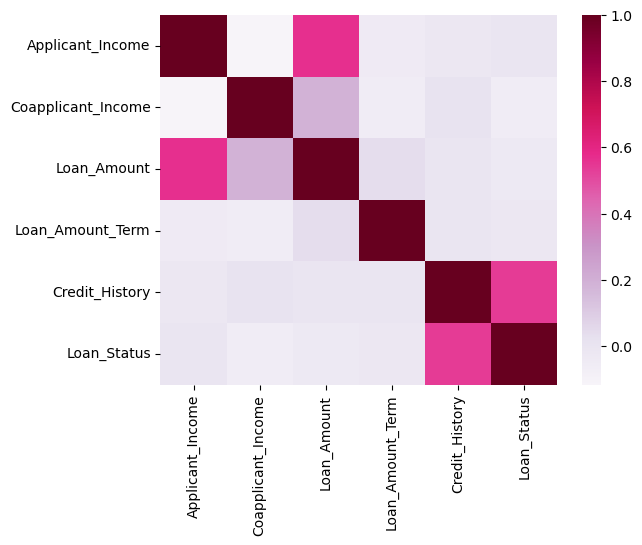

In [51]:
# Plotting the correlation analysis of the new dataframe
sns.heatmap(df1.corr(), cmap='PuRd')

From the heatmap, we can see that the Applicant_Income has strong correlation with Loan_Amount , and the Credit_History has strong correlation with the Loan_Status.

#### Here are some specific questions about the dataset:
#### 1. Data Overview and Summary:
* **How many loan applications are included in the dataset?**
    * There are 614 applications in the dataset.  
<p>&nbsp;</p>
* **What is the overall approval rate for loan applications in the dataset?**
    * The overall approval rate for loan applicants is around 69%.
    <p>&nbsp;</p>
* **What is the distribution of loan applicants based on gender and marital status?**
    * The dataset includes 502 Male and 112 Female.
    * The dataset includes 401 Married applicant and 213 Un-Married.
    <p>&nbsp;</p>
    <p>&nbsp;</p>
#### 2. Income and Loan Amount:
* **What is the range of applicant income and coapplicant income?**
    * The applicant income ranges from 150 to 81,000.
    * The coapplicant income ranges from 0 to 41,667.
    <p>&nbsp;</p>
* **How does the distribution of applicant income differ based on gender and education?**
    * Based on Gender:
        * For Females: the applicant income ranges from 210 to 19,484.
        * For Males: the applicant income ranges from 150 to 81,000.
    * Based on Education:
        * For Not Graduate: the applicant income ranges from 150 to 18,165
        * For Graduate: the applicant income ranges from 210 to 81,000.
         <p>&nbsp;</p>
* **Is there a correlation between applicant income and the requested loan amount?**
    * Yes there is a correlation between applicant income and loan amount as shown in the heatmap.
     <p>&nbsp;</p> <p>&nbsp;</p>
#### 3. Loan Approval and Credit History:
* **How does credit history relate to loan approval rates?**
    * The credit history has a strong correlation with the loan approval rates, if there is a credit history there will be around 80% approval rate.
     <p>&nbsp;</p>
* **What percentage of loan applicants with good credit history (Credit_History = 1) were approved for loans?**
    * Around 80% of the applicants with good credit history were approved for loan.
     <p>&nbsp;</p>
* **Are there any notable differences in loan approval rates between urban, semiurban, and rural property areas?**
    * The loan approval rate for semiurban was 77%, for urban was 66%, and for rural was 61%.
    <p>&nbsp;</p>
    <p>&nbsp;</p>
#### 4. Dependents and Education:
* **How does the number of dependents impact loan approval rates?**
    * There is no noticeable impact for number of dependents on the approval rate as the approval rates are more or less similar to different kinds, with a slight exception for the applicants that has 2 dependents.
    <p>&nbsp;</p>
* **Does educational background (Education) play a role in loan approval?**
    * Educational background plays a small role in loan approval as the approval rate for graduate is 71%, while it is 61% for non-graduate applicants.
    <p>&nbsp;</p><p>&nbsp;</p>
#### 5. Loan Term and Amount:
* **Is there a connection between the loan term (Loan_Amount_Term) and the loan approval outcome?**
    * there is no clear connection between the loan term and the loan status, however, it is shown that the applicants with loan terms more than 31 years has only 40% approval rate compared to the reset of the loan terms that has an average approval rate of 70%.
    <p>&nbsp;</p>
* **How does the requested loan amount (LoanAmount) vary across different property areas?**
    * For Rural areas, the loan amount varies from 40 to 570.
    * For Semiurban areas, the loan amount varies from 25 to 600
    * For Urban areas, the loan amount varies from 9 to 700.